In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout, BatchNormalization

In [3]:
df = pd.read_csv('NVDA.csv')
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6558 non-null   datetime64[ns]
 1   Adj Close  6558 non-null   float64       
 2   Close      6558 non-null   float64       
 3   High       6558 non-null   float64       
 4   Low        6558 non-null   float64       
 5   Open       6558 non-null   float64       
 6   Volume     6558 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 358.8 KB


In [6]:
numerical_columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,6558,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,2012-02-02 07:47:15.864592896,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
min,1999-01-22 00:00:00,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,2005-07-29 18:00:00,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,2012-02-01 12:00:00,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,2018-08-07 18:00:00,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,2025-02-14 00:00:00,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09
std,NaN,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08


In [9]:
df.corr(numeric_only=True)

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999799,0.999861,0.999613,-0.164438
Close,1.000000,1.000000,0.999799,0.999861,0.999613,-0.164415
High,0.999799,0.999799,1.000000,0.999803,0.999881,-0.163423
Low,0.999861,0.999861,0.999803,1.000000,0.999797,-0.165182
Open,0.999613,0.999613,0.999881,0.999797,1.000000,-0.164090
Volume,-0.164438,-0.164415,-0.163423,-0.165182,-0.164090,1.000000


In [10]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [11]:
df = df.sort_values(by='Date')

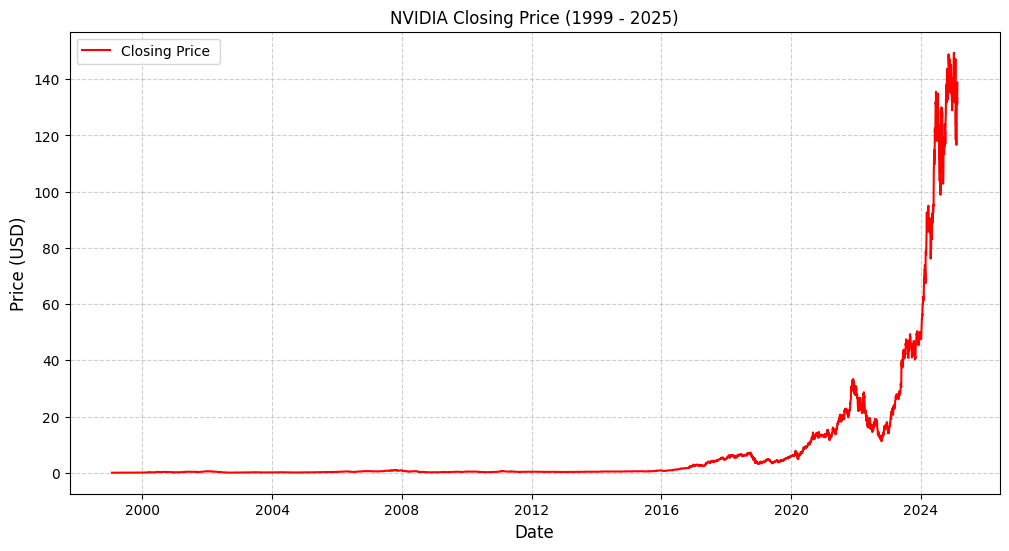

In [12]:
plt.figure(figsize=(12,6))

plt.plot(df["Date"],df["Close"],label="Closing Price ", color="red", linewidth=1.5)
plt.title("NVIDIA Closing Price (1999 - 2025)")
plt.xlabel("Date",fontsize=12)
plt.ylabel("Price (USD)",fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

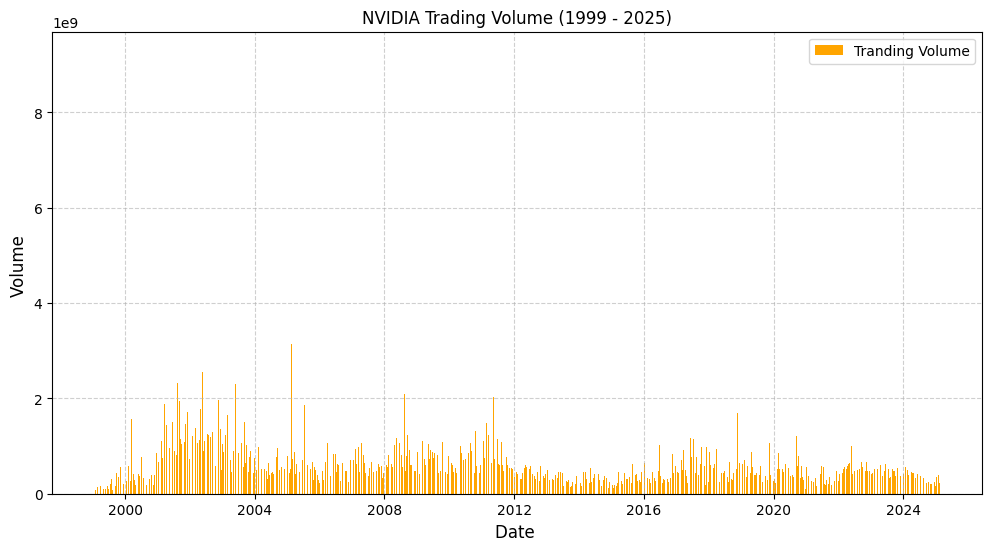

In [13]:
plt.figure(figsize=(12, 6))

plt.bar(df["Date"],df["Volume"], label="Tranding Volume",color="orange")
plt.title("NVIDIA Trading Volume (1999 - 2025)")
plt.xlabel('Date ', fontsize=12)
plt.ylabel('Volume ', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

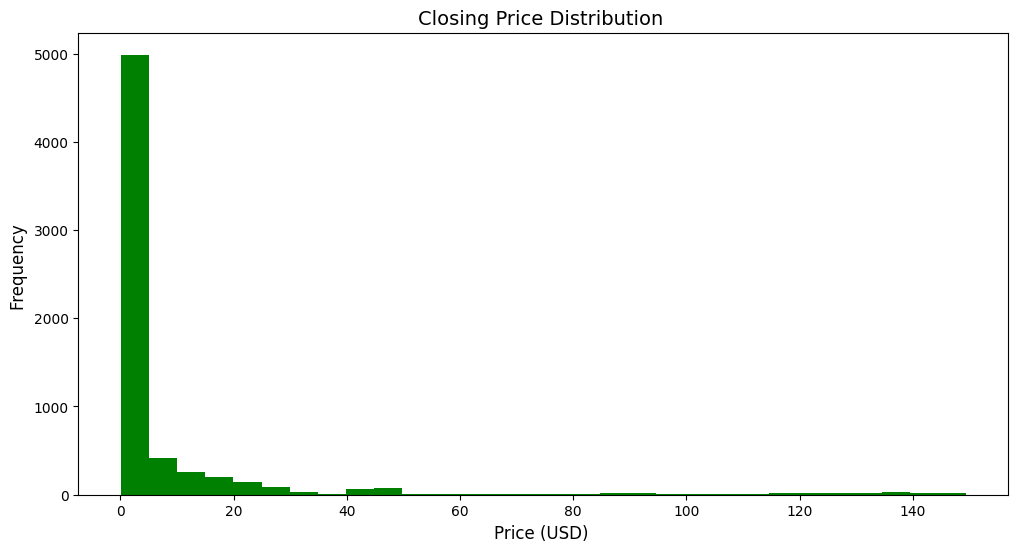

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(df['Close'], bins=30, color='green')
plt.title('Closing Price Distribution ', fontsize=14)
plt.xlabel('Price (USD) ', fontsize=12)
plt.ylabel('Frequency ', fontsize=12)
plt.show()

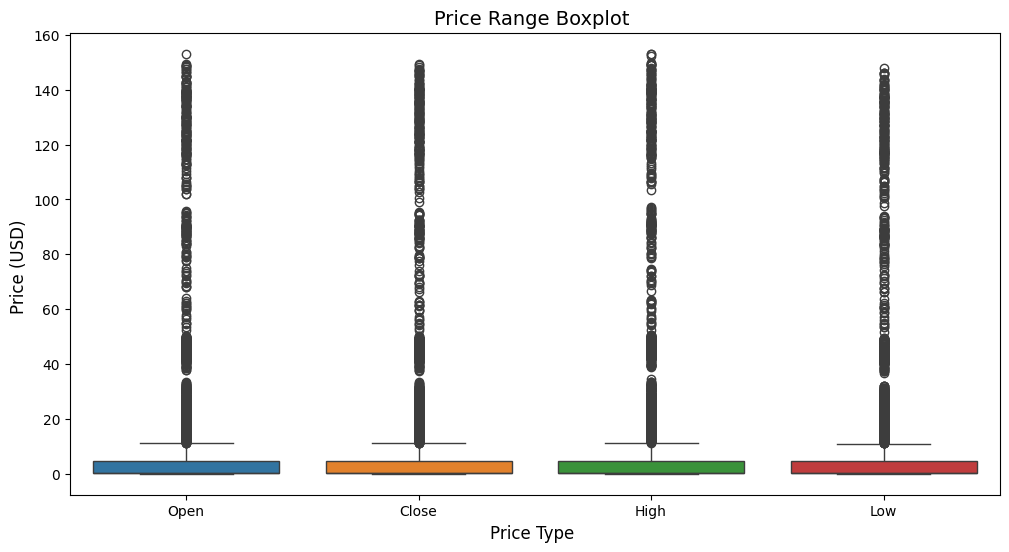

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open','Close', 'High', 'Low']])
plt.title('Price Range Boxplot ', fontsize=14)
plt.xlabel('Price Type ', fontsize=12)
plt.ylabel('Price (USD) ', fontsize=12)
plt.show()

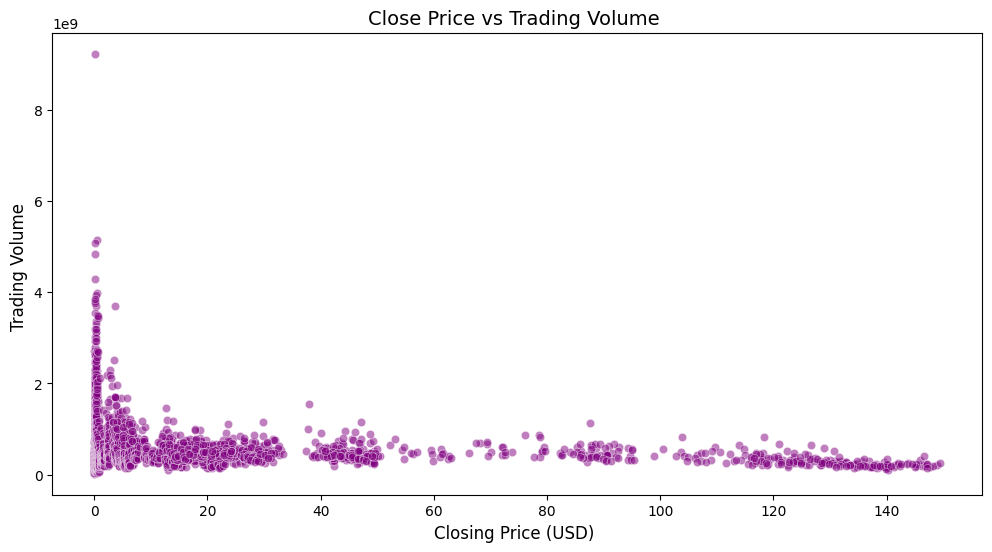

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Close'], y=df['Volume'], alpha=0.5, color='purple')
plt.title('Close Price vs Trading Volume ', fontsize=14)
plt.xlabel('Closing Price (USD) ', fontsize=12)
plt.ylabel('Trading Volume ', fontsize=12)
plt.show()

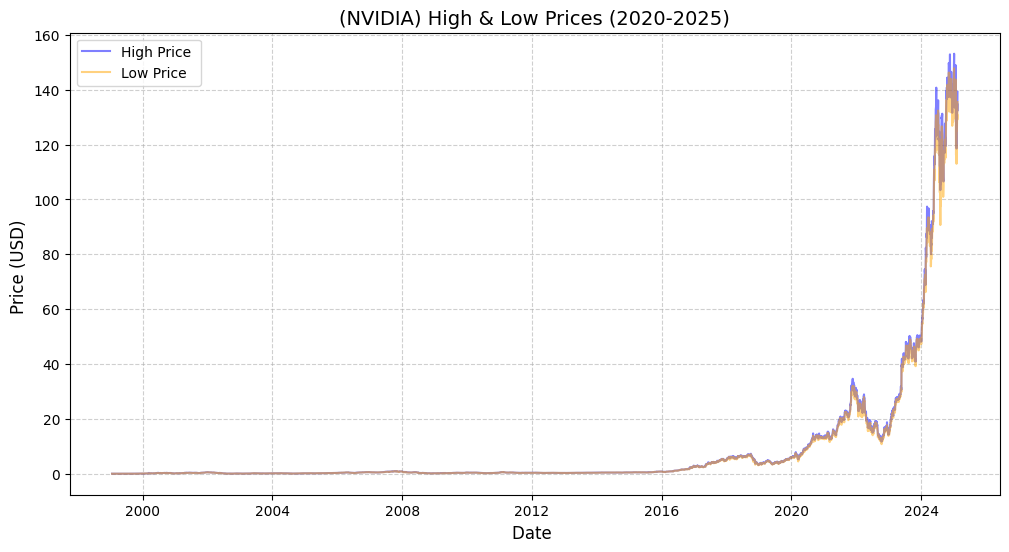

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High Price ', color='blue', linewidth=1.5,alpha=0.5)
plt.plot(df['Date'], df['Low'], label='Low Price ', color='orange', linewidth=1.5,alpha=0.5)
plt.title('(NVIDIA) High & Low Prices (2020-2025)', fontsize=14)
plt.xlabel('Date ', fontsize=12)
plt.ylabel('Price (USD) ', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

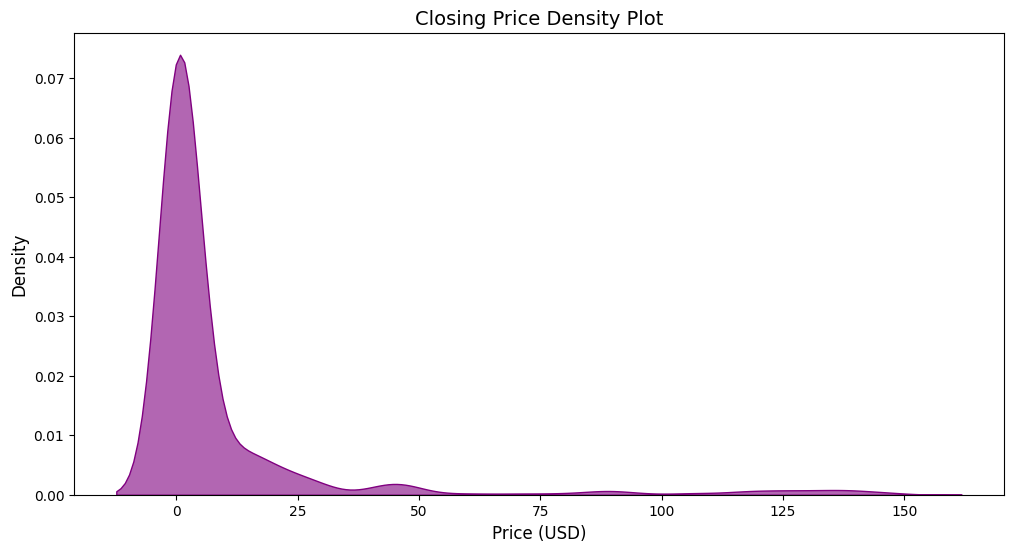

In [18]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Close'], fill=True, color='purple', alpha=0.6)
plt.title('Closing Price Density Plot', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

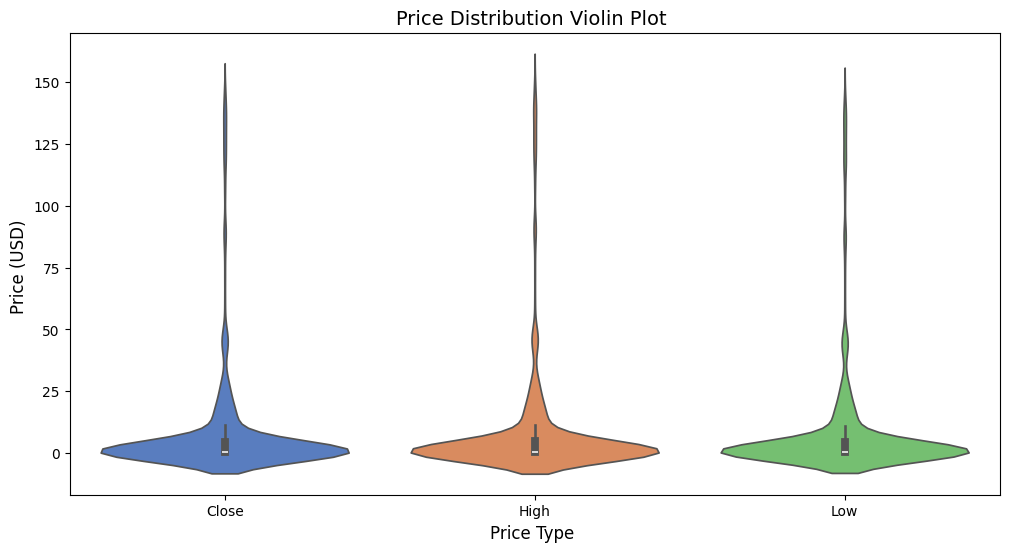

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Close', 'High', 'Low']], palette='muted')
plt.title('Price Distribution Violin Plot ', fontsize=14)
plt.xlabel('Price Type ', fontsize=12)
plt.ylabel('Price (USD) ', fontsize=12)
plt.show()

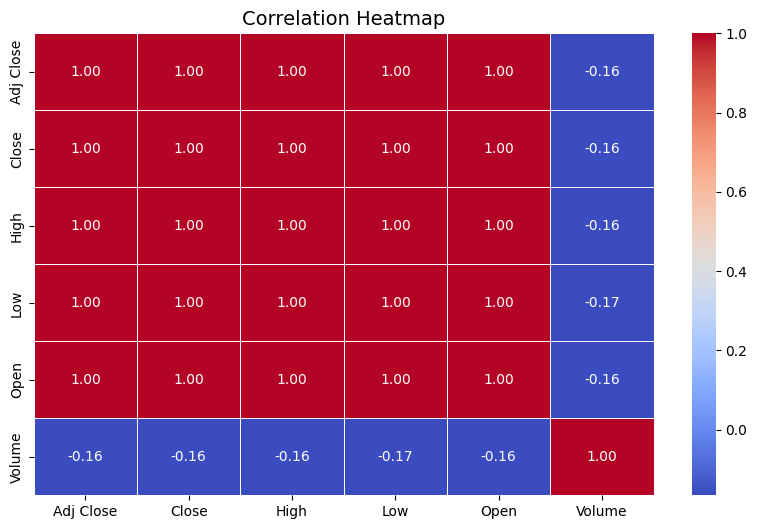

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

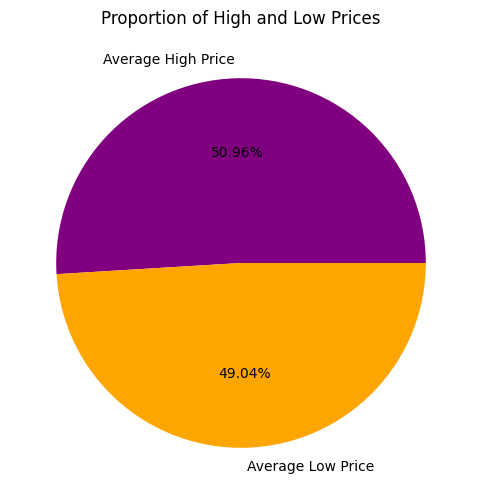

In [21]:
high_low_ratio = [df["High"].mean(), df["Low"].mean()]
labels = ["Average High Price", "Average Low Price"]
plt.figure(figsize=(6, 6))
plt.pie(high_low_ratio, labels=labels, autopct="%.2f%%", colors=["purple", "orange"])
plt.title("Proportion of High and Low Prices")
plt.show()

ML Models

In [22]:
X = df[["Open", "High", "Low", "Volume"]]
y=df["Close"]

In [23]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(max_iter=10000),
    "ElasticNet Regression": ElasticNet(max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
}

In [26]:
results={}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train,y_train)
    end_time = time.time()
    y_pred=model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    train_time = end_time - start_time
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2, "Training Time (s)": train_time}

In [27]:
results_df = pd.DataFrame(results).T

In [28]:
results_df

,MAE,MSE,RMSE,R2 Score,Training Time (s)
Linear Regression,0.080341,0.094662,0.307672,0.999839,0.003055
Lasso Regression,0.123431,0.169101,0.411218,0.999712,0.031215
ElasticNet Regression,0.118249,0.154090,0.392542,0.999738,0.023261
Random Forest,0.112131,0.166166,0.407635,0.999717,1.550524
Gradient Boosting,0.144767,0.200737,0.448037,0.999658,0.606711
AdaBoost Regressor,2.134196,5.185761,2.277227,0.991169,0.229681
Extra Trees Regressor,0.104615,0.147782,0.384425,0.999748,0.601528
XGBoost Regressor,0.230774,0.834200,0.913346,0.998579,0.071940
Support Vector Regressor,8.947584,661.369884,25.717113,-0.126229,0.583814
K-Nearest Neighbors,13.013694,657.503577,25.641833,-0.119645,0.003047


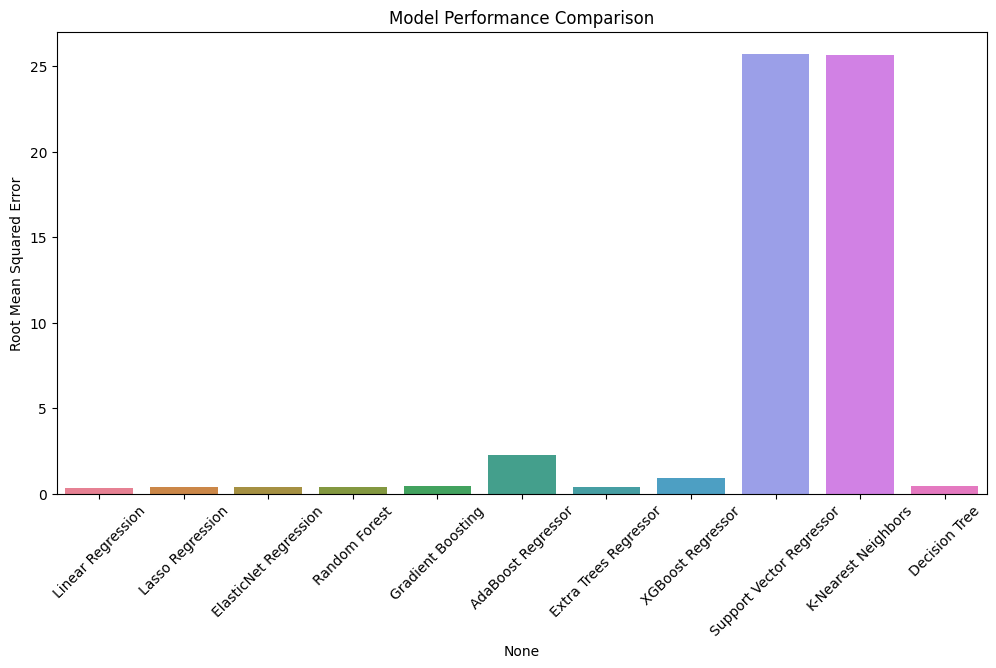

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["RMSE"], hue=results_df.index, dodge=False)
plt.xticks(rotation=45)
plt.ylabel("Root Mean Squared Error")
plt.title("Model Performance Comparison")
plt.show()

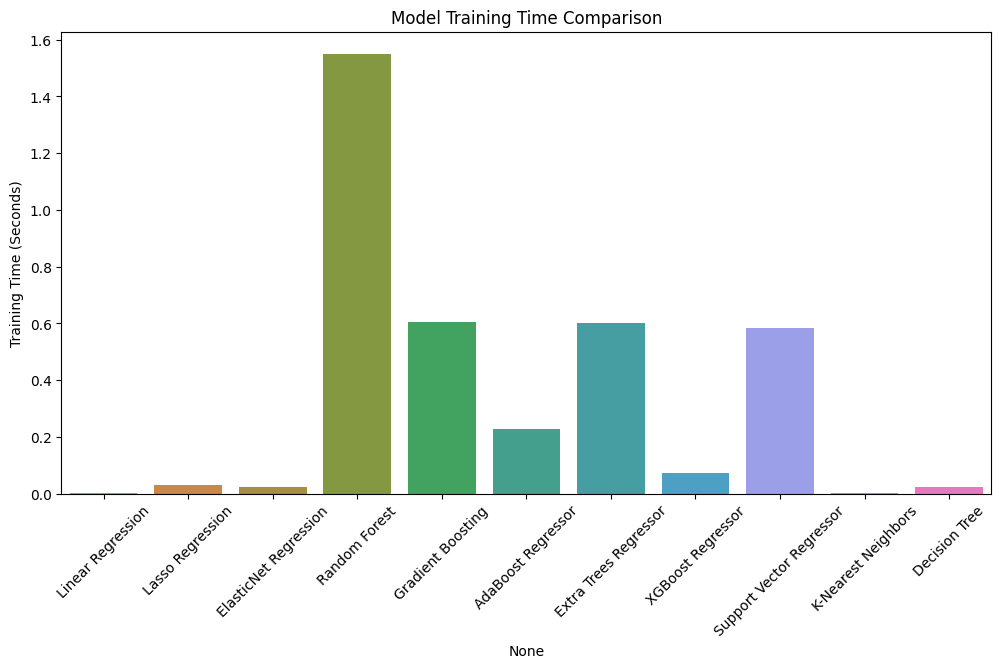

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["Training Time (s)"], hue=results_df.index, dodge=False)
plt.xticks(rotation=45)
plt.ylabel("Training Time (Seconds)")
plt.title("Model Training Time Comparison")
plt.show()

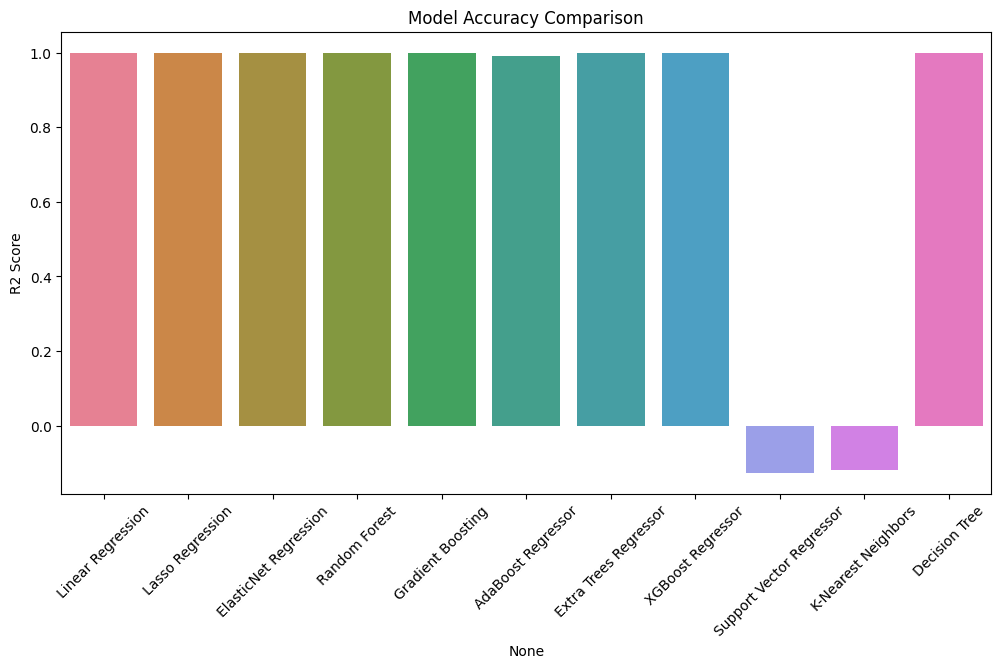

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["R2 Score"], hue=results_df.index, dodge=False)
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.title("Model Accuracy Comparison")
plt.show()

DL Models

In [33]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Close']])

In [34]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60 
X, y = create_sequences(df_scaled, seq_length)

In [35]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [36]:
def build_lstm_model():
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(seq_length, 1)),
        BatchNormalization(),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_rnn_model():
    model = Sequential([
        SimpleRNN(128, return_sequences=True, input_shape=(seq_length, 1)),
        BatchNormalization(),
        SimpleRNN(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_gru_model():
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=(seq_length, 1)),
        BatchNormalization(),
        GRU(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [37]:
models = {
    "LSTM": build_lstm_model(),
    "RNN": build_rnn_model(),
    "GRU": build_gru_model()
}


results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
    end_time = time.time()
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    train_time = end_time - start_time

     # Calculate accuracy
    threshold = 0.05  # 5% tolerance level
    correct_predictions = np.abs((y_pred - y_test) / y_test) < threshold
    accuracy = np.mean(correct_predictions) * 100
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2, "Training Time (s)": train_time, "Accuracy (%)": accuracy}

e:\miniconda3\envs\StockMarketForcastinAI\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 9.4855e-05 - mae: 0.0052 - val_loss: 0.1272 - val_mae: 0.2470
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.1383e-06 - mae: 0.0015 - val_loss: 0.1086 - val_mae: 0.2223
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.4644e-06 - mae: 0.0015 - val_loss: 0.0983 - val_mae: 0.2050
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.1618e-06 - mae: 0.0015 - val_loss: 0.0835 - val_mae: 0.1789
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 3.2602e-06 - mae: 0.0013 - val_loss: 0.0595 - val_mae: 0.1317
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.3089e-06 - mae: 0.0013 - val_loss: 0.0636 - val_mae: 0.1356
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.3729e-06 - mae: 0.0013 - val_loss: 0.0559 - val_mae: 0.1266
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.5938e-06 - mae: 0.0015 - val_loss: 0.0517 - val_mae: 0.1108
Epoch 9/50
163/1

In [39]:
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score,Training Time (s),Accuracy (%)
LSTM,0.161630,0.092133,0.303534,-0.261974,206.351229,0.000000
RNN,0.158111,0.079903,0.282672,-0.094460,83.743238,2.307692
GRU,0.075626,0.024468,0.156422,0.664856,207.883645,34.076923


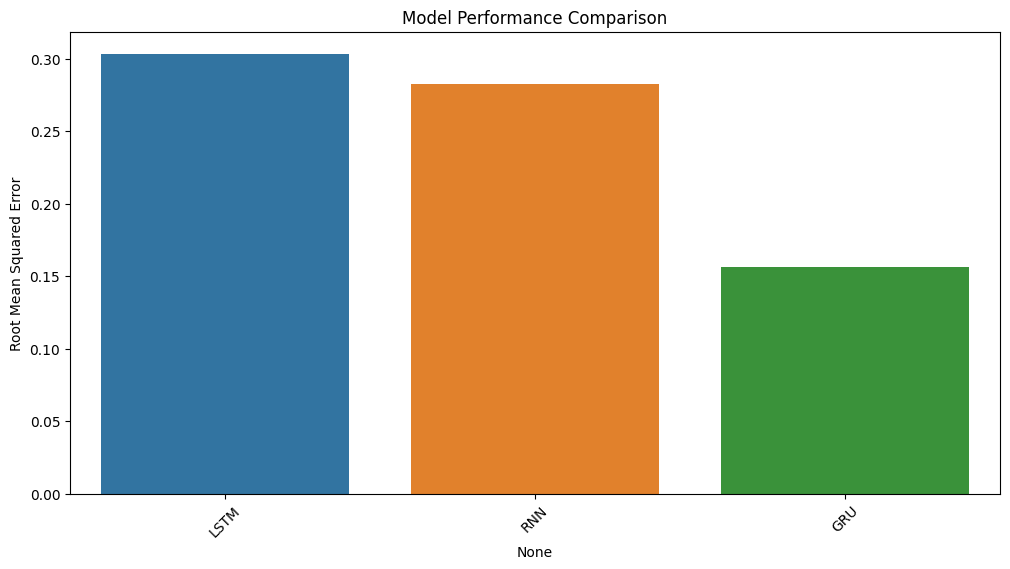

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["RMSE"], hue=results_df.index, dodge=False)
plt.xticks(rotation=45)
plt.ylabel("Root Mean Squared Error")
plt.title("Model Performance Comparison")
plt.show()

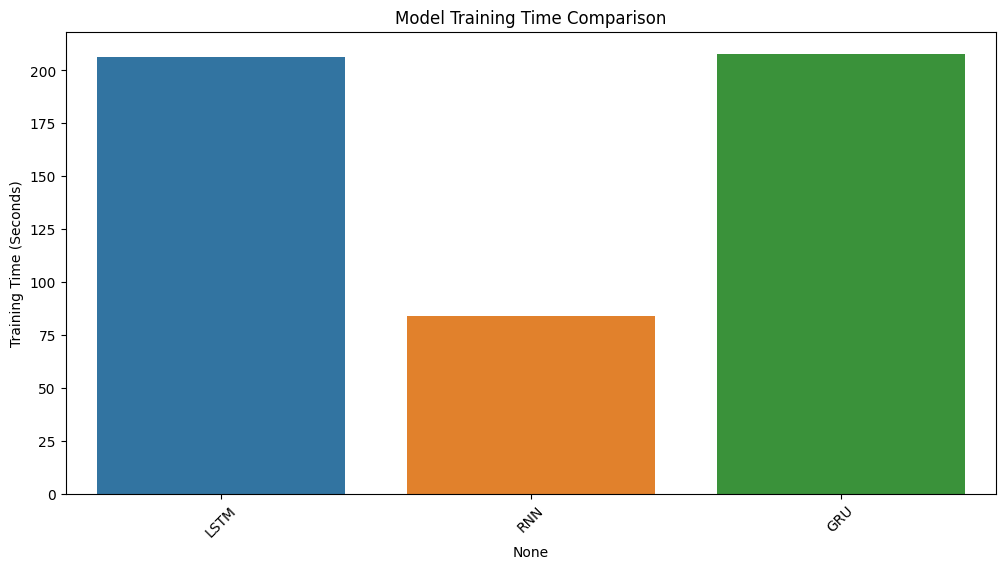

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["Training Time (s)"], hue=results_df.index, dodge=False)
plt.xticks(rotation=45)
plt.ylabel("Training Time (Seconds)")
plt.title("Model Training Time Comparison")
plt.show()

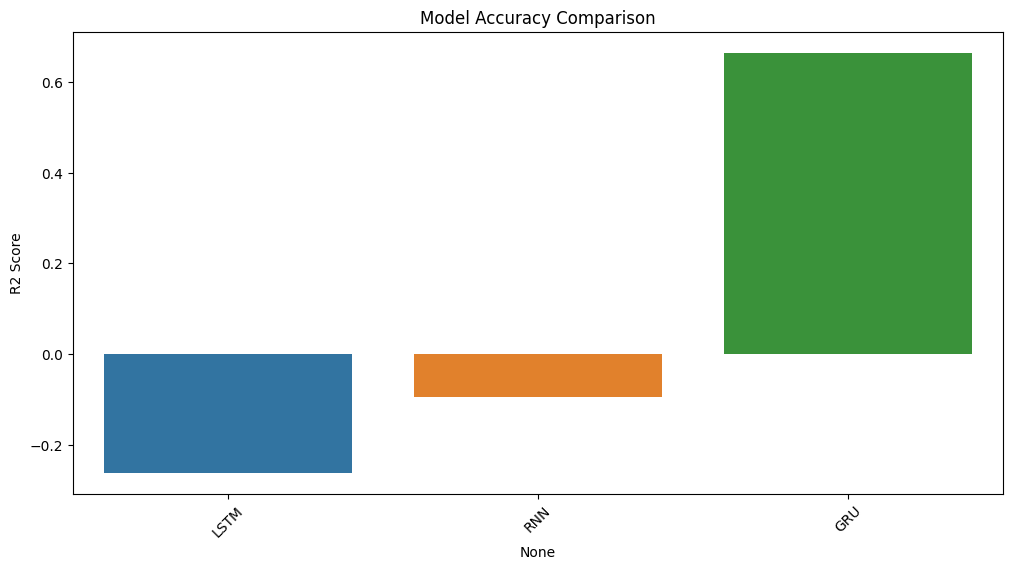

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["R2 Score"], hue=results_df.index, dodge=False)
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.title("Model Accuracy Comparison")
plt.show()

In [43]:
model = build_gru_model()
start_time = time.time()
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
end_time = time.time()

Epoch 1/50


e:\miniconda3\envs\StockMarketForcastinAI\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 8.2738e-05 - mae: 0.0048 - val_loss: 0.1222 - val_mae: 0.2451
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.8725e-06 - mae: 0.0015 - val_loss: 0.1025 - val_mae: 0.2238
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.3879e-06 - mae: 0.0014 - val_loss: 0.0598 - val_mae: 0.1665
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4.6173e-06 - mae: 0.0014 - val_loss: 0.0355 - val_mae: 0.1282
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.9100e-06 - mae: 0.0014 - val_loss: 0.0123 - val_mae: 0.0543
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.2521e-06 - mae: 0.0012 - val_loss: 0.0130 - val_mae: 0.0570
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.8651e-06 - mae: 0.0012 - val_loss: 0.0088 - val_mae: 0.0526
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.8010e-06 - mae: 0.0014 - val_loss: 0.0091 - val_mae: 0.0455
Epoch 9/50
163/163 ━━━━━━━━

In [44]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [45]:
future_dates = pd.date_range(start=df["Date"].iloc[-1], periods=36, freq='ME')
future_inputs = df_scaled[-seq_length:].reshape(1, seq_length, 1)
monthly_predictions = []
for _ in range(36):
    next_pred = model.predict(future_inputs)
    monthly_predictions.append(next_pred[0][0])
    future_inputs = np.append(future_inputs[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

weekly_dates = pd.date_range(start=df["Date"].iloc[-1], periods=156, freq='W')
future_inputs = df_scaled[-seq_length:].reshape(1, seq_length, 1)
weekly_predictions = []
for _ in range(156):
    next_pred = model.predict(future_inputs)
    weekly_predictions.append(next_pred[0][0])
    future_inputs = np.append(future_inputs[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [46]:
monthly_predictions_scaled = scaler.inverse_transform(np.array(monthly_predictions).reshape(-1,1))
weekly_predictions_scaled = scaler.inverse_transform(np.array(weekly_predictions).reshape(-1,1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_scaled = scaler.inverse_transform(y_pred.reshape(-1,1))

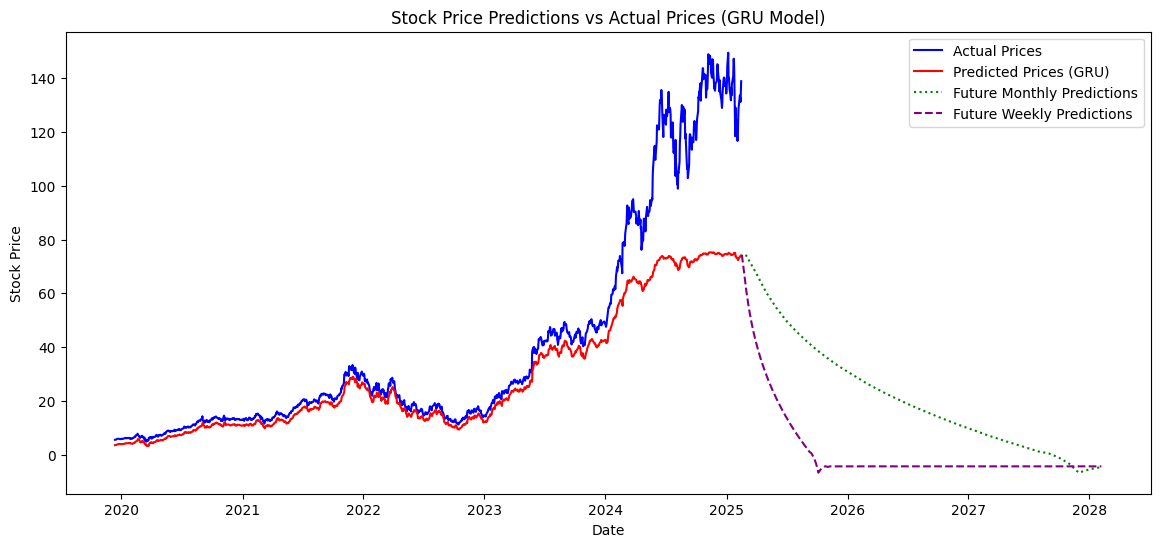

In [47]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"].iloc[train_size+seq_length:], y_test_scaled, label='Actual Prices', color='blue')
plt.plot(df["Date"].iloc[train_size+seq_length:], y_pred_scaled, label='Predicted Prices (GRU)', color='red')
plt.plot(future_dates, monthly_predictions_scaled, label='Future Monthly Predictions', linestyle='dotted', color='green')
plt.plot(weekly_dates, weekly_predictions_scaled, label='Future Weekly Predictions', linestyle='dashed', color='purple')
plt.legend()
plt.title("Stock Price Predictions vs Actual Prices (GRU Model)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

1) The NVIDIA stock price dataset is loaded and converted into a time-series format.
2) The closing prices are normalized using MinMaxScaler to improve training efficiency.
3) A sequence length of 60 days is chosen to capture trends in stock prices.
4) A function generates input (X) and output (y) pairs, where X contains past stock prices, and y is the next predicted price.
5) The dataset is divided into 80% training and 20% testing to train the model effectively.
6) This ensures that the model learns from past data while being evaluated on unseen data.
7) A GRU (Gated Recurrent Unit) model is built with the following layers:
- GRU layer (128 units) with return sequences enabled.
- Batch Normalization to stabilize learning.
- GRU layer (64 units) to refine predictions.
- Dropout (20%) to prevent overfitting.
- Dense layers for final prediction.
8) The model is compiled with Adam optimizer and MSE loss function.
9) The GRU model is trained using 50 epochs and a batch size of 32.
10) Validation is performed on the test set during training to monitor performance.
11) The trained model predicts stock prices for the test set.
12) The results are inverse-transformed to original price values.
13) The model's accuracy is measured using MAE, MSE, RMSE, R2 Score, and Accuracy (%).
14) These metrics help in understanding how close the predictions are to real values.
15) The model generates weekly and monthly predictions until the end of 2027.
16) The predicted prices are converted back to their original scale.
17) The results are plotted:
- Bar charts compare RMSE, training time, and R2 score.
- A line plot compares actual vs. predicted stock prices, along with future projections.